In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from pywt import scale2frequency

In [3]:
def upwell(ektrxs, ektrys, coast_angle):
    pi = 3.1415927
    degtorad = pi/180.
    alpha = (360 - coast_angle) * degtorad
    s1 = np.cos(alpha)
    t1 = np.sin(alpha)
    s2 = -1 * t1
    t2 = s1
    res = []
    for x, y in zip(ektrxs, ektrys):
        x = float(x)
        y = float(y)
        perp = (s1 * x) + (t1 * y)
        para = (s2 * x) + (t2 * y)
        res.append(perp/10)
    return(res)

angle_24_5 = 225
angle_25_5 = 190
angle_26_5 = 235
angle_27_5 = 200
angle_28_5 = 230
angle_29_5 = 185
angle_30_5 = 180
angle_31_5 = 210

def read_file(file_name, angle):
    df = pd.read_csv(file_name)
    df = df.iloc[1: , :]
    res = upwell(df['ektrx'], df['ektry'], angle)
    return res


In [8]:
lat_24 = read_file('40years-24.5.csv', angle_24_5)
lat_25 = read_file('40years-25.5.csv', angle_25_5)
lat_26 = read_file('40years-26.5.csv', angle_26_5)
lat_27 = read_file('40years-27.5.csv', angle_27_5)
lat_28 = read_file('40years-28.5.csv', angle_28_5)
lat_29 = read_file('40years-29.5.csv', angle_29_5)
lat_30 = read_file('40years-30.5.csv', angle_30_5)
lat_31 = read_file('40years-31.5.csv', angle_31_5)

N = len(lat_24)
t0=1982
dt= (1/12)
time = np.arange(0, N) * dt + t0
sampling_period = 1/12

In [19]:
def normalize_data(data):
    res = (data - np.mean(data)) / np.std(data)
    return res
lat_24 = normalize_data(lat_24)
lat_25= normalize_data(lat_25)
lat_26 = normalize_data(lat_26)
lat_27 = normalize_data(lat_27)
lat_28 = normalize_data(lat_28)
lat_29 = normalize_data(lat_29)
lat_30 = normalize_data(lat_30)
lat_31 = normalize_data(lat_31)

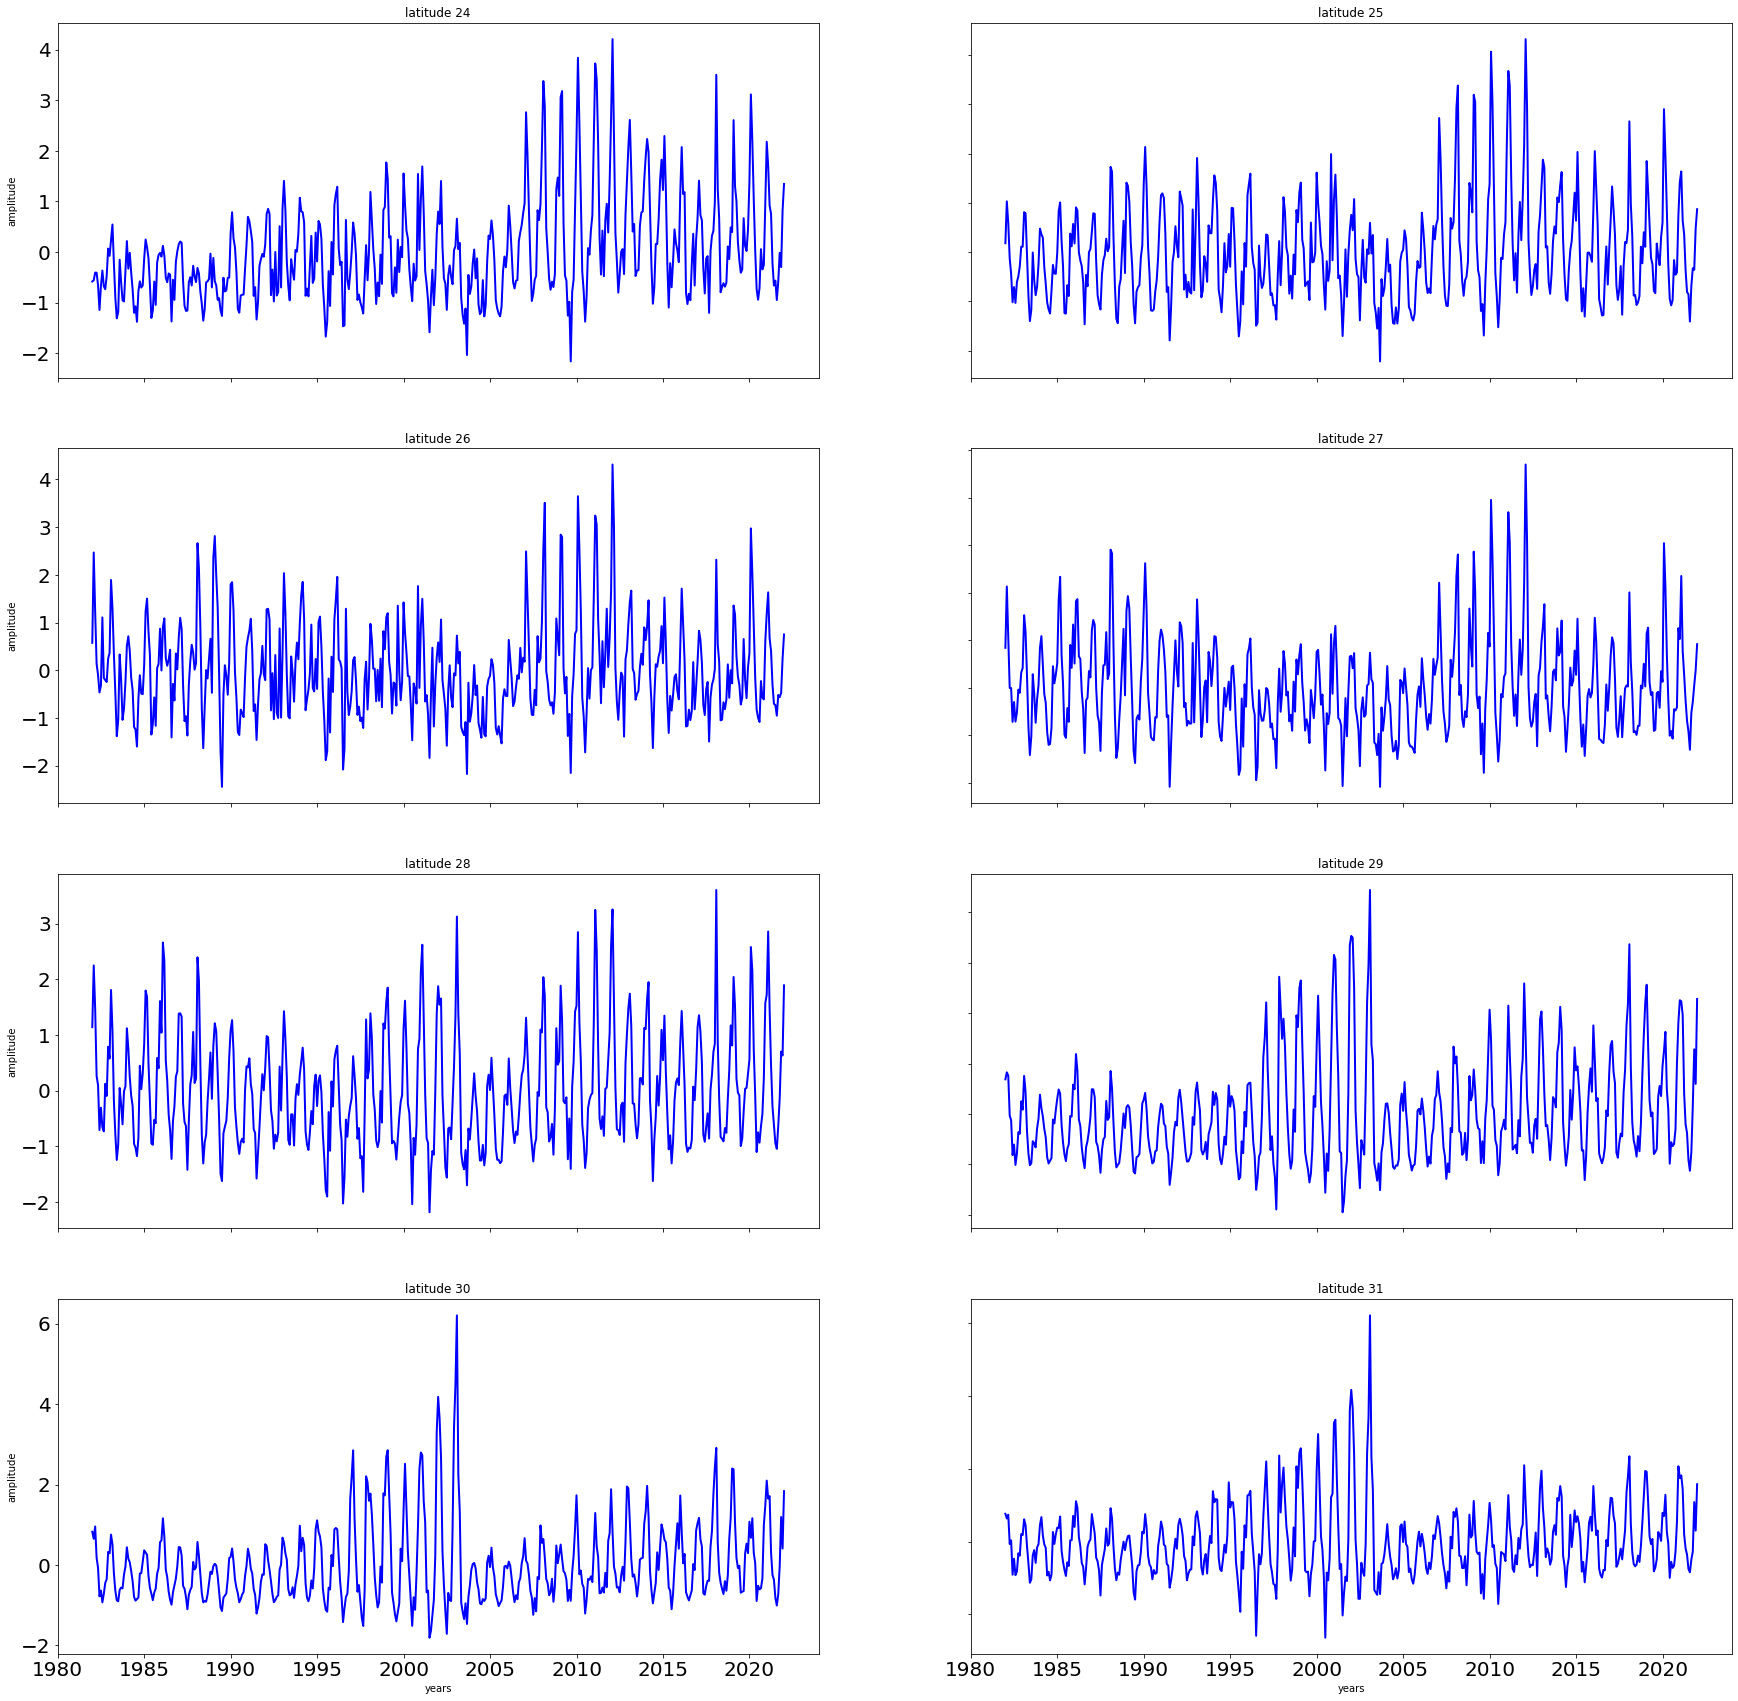

In [20]:
fig, axs = plt.subplots(4,2, figsize=(30,30))
axs[0,0].plot(time, lat_24, color='b', lw=2)
axs[0, 0].set_title('latitude 24')
axs[0,1].plot(time, lat_25, color='b', lw=2)
axs[0, 1].set_title('latitude 25')
axs[1,0].plot(time, lat_26, color='b', lw=2)
axs[1, 0].set_title('latitude 26')
axs[1,1].plot(time, lat_27, color='b', lw=2)
axs[1, 1].set_title('latitude 27')
axs[2,0].plot(time, lat_28, color='b', lw=2)
axs[2, 0].set_title('latitude 28')
axs[2,1].plot(time, lat_29, color='b', lw=2)
axs[2, 1].set_title('latitude 29')
axs[3,0].plot(time, lat_30, color='b', lw=2)
axs[3, 0].set_title('latitude 30')
axs[3,1].plot(time, lat_31, color='b', lw=2)
axs[3, 1].set_title('latitude 31')
for ax in axs.flat:
    ax.set(xlabel='years', ylabel='amplitude')
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
scales = np.arange(1, 128)

[wc, freq] = pywt.cwt(upwelling_data, scales, 'morl', 1/12)

power = wc**2
period = 1. / freq

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
contourlevels = np.log2(levels)
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both', cmap='seismic')
    
ax.set_title('Power Spectrum of Wavelet Transform for Latitude: -22.5 & longtitude: 288.5', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.show()

/var/folders/5z/yrzkyfzj46z3vdkj89vx_vy40000gn/T/ipykernel_95133/3744992081.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])


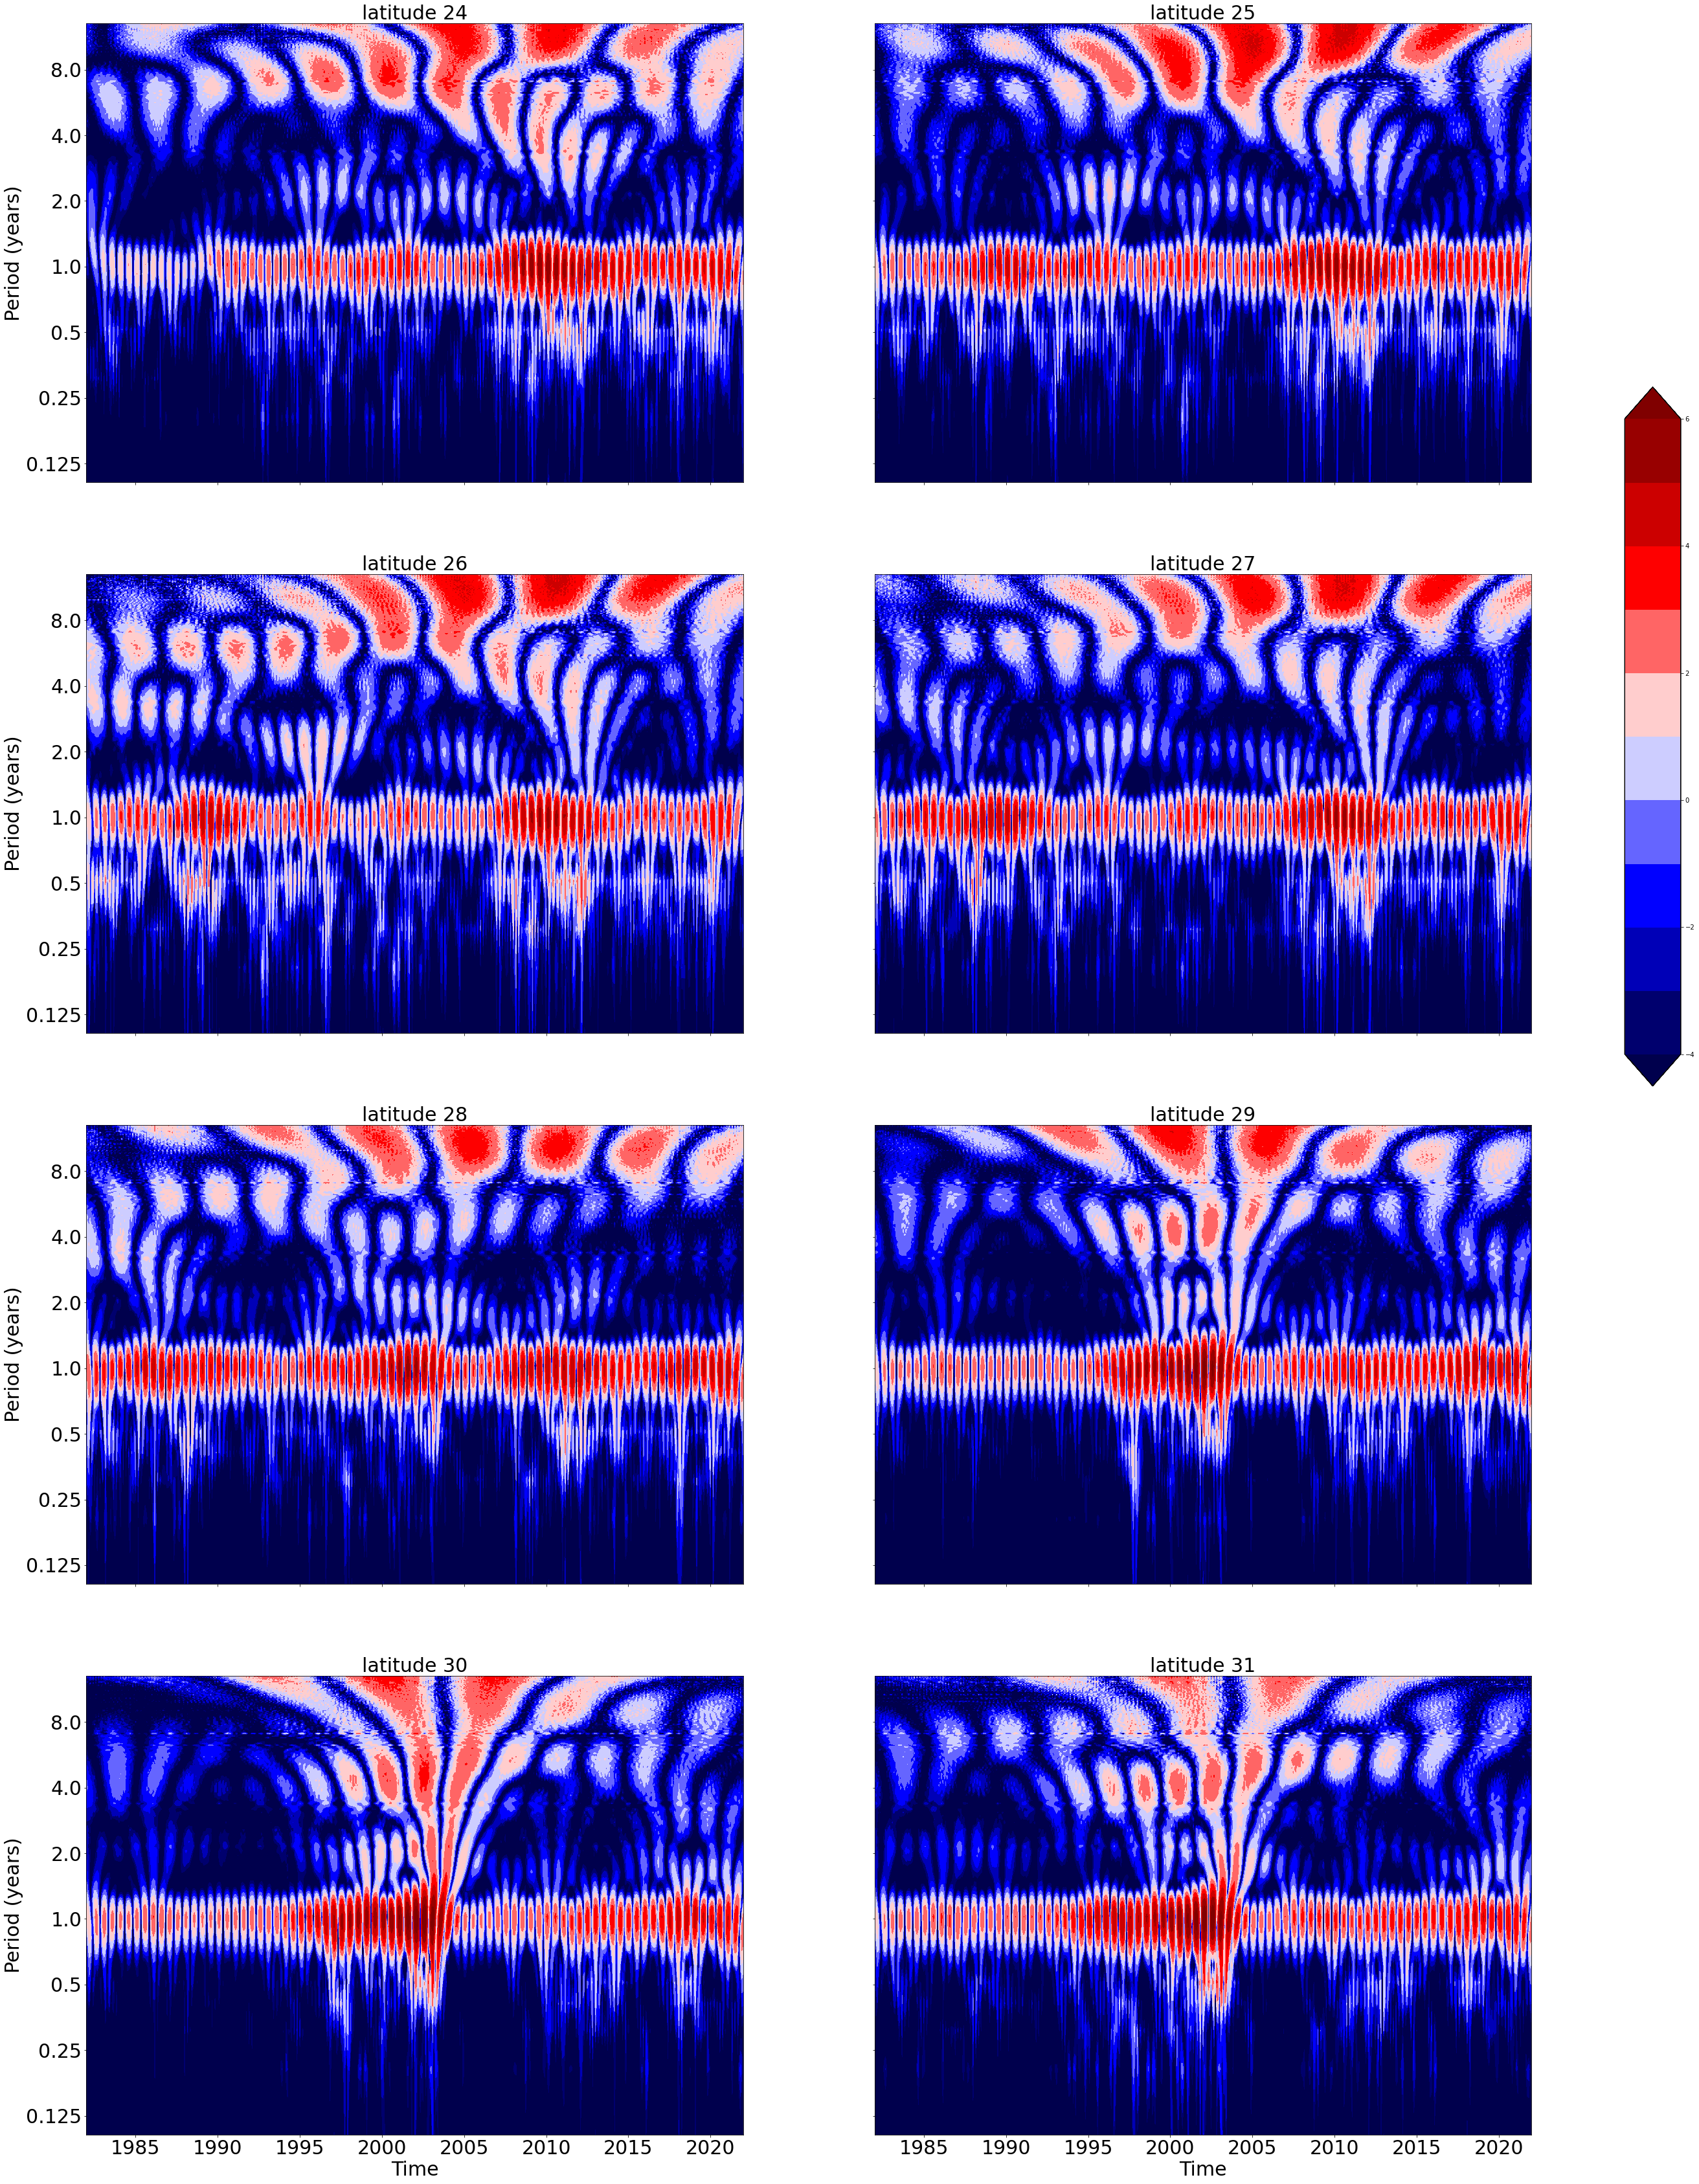

In [21]:
def plot_wavelet(ax, time, signal, scales, waveletname = 'morl', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = coefficients**2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
    contourlevels = np.log2(levels)
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=30)
    ax.set_xlabel(xlabel, fontsize=30)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.tick_params(axis="x", labelsize=30)
    ax.tick_params(axis="y", labelsize=30)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[1], ylim[0])
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")

    return yticks, ylim
scales = np.arange(1, 128)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

fig, axs = plt.subplots(4,2,figsize=(40, 60))
plot_wavelet(axs[0,0], time, lat_24, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 24')
plot_wavelet(axs[0,1], time, lat_25, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 25')
plot_wavelet(axs[1,0], time, lat_26, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 26')
plot_wavelet(axs[1,1], time, lat_27, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 27')
plot_wavelet(axs[2,0], time, lat_28, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 28')
plot_wavelet(axs[2,1], time, lat_29, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 29')
plot_wavelet(axs[3,0], time, lat_30, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 30')
plot_wavelet(axs[3,1], time, lat_31, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 31')
for ax in axs.flat:
    ax.label_outer()
plt.show()

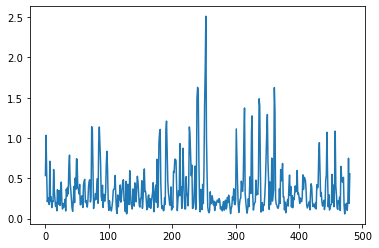

In [22]:
sd = []
total = [lat_24, lat_25, lat_26, lat_27, lat_28, lat_29, lat_30, lat_31]
for i in range(len(lat_24)):
    summation = 0
    for j in range(len(total)):
        summation += total[j][i]
    summation = summation / len(total)
    final = 0
    for z in total:
        final += (z[i] - summation)**2 / (len(total) - 1)
    final = np.sqrt(final)
    sd.append(final)
plt.plot(range(len(sd)),sd)

In [74]:
w_30_twenty = pd.read_csv('30N_119W.csv', header=None)
w_45_twenty = pd.read_csv('45N 125W.csv', header=None)
w_42_twenty = pd.read_csv('42N_125W.csv', header=None)
w_39_twenty = pd.read_csv('39N_125W.csv', header=None)
w_36_twenty = pd.read_csv('36N_122W.csv', header=None)
w_33_twenty = pd.read_csv('33N_119W.csv', header=None)
w_27_twenty = pd.read_csv('27N_116W.csv', header=None)

In [99]:
w_30_five = list(normalize_data(w_30_twenty[w_30_twenty[0] >= 20170730][1]))
w_45_five = list(normalize_data(w_45_twenty[w_45_twenty[0] >= 20170730][1]))
w_42_five = list(normalize_data(w_42_twenty[w_42_twenty[0] >= 20170730][1]))
w_39_five = list(normalize_data(w_39_twenty[w_39_twenty[0] >= 20170730][1]))
w_36_five = list(normalize_data(w_36_twenty[w_36_twenty[0] >= 20170730][1]))
w_33_five = list(normalize_data(w_33_twenty[w_33_twenty[0] >= 20170730][1]))
w_27_five = list(normalize_data(w_27_twenty[w_27_twenty[0] >= 20170730][1]))

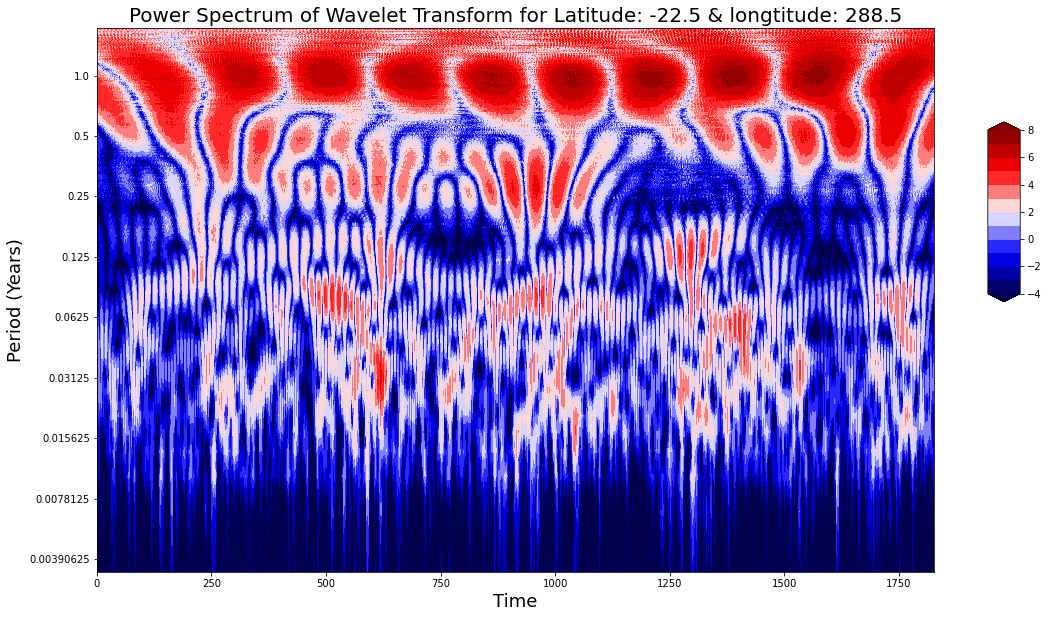

In [81]:
scales = np.arange(1, 512)

[wc, freq] = pywt.cwt(w_30_five, scales, 'morl', 1/365)

power = wc**2
period = 1. / freq

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
contourlevels = np.log2(levels)
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time_axis, np.log2(period), np.log2(power), contourlevels, extend='both', cmap='seismic')
    
ax.set_title('Power Spectrum of Wavelet Transform for Latitude: -22.5 & longtitude: 288.5', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.show()

/var/folders/5z/yrzkyfzj46z3vdkj89vx_vy40000gn/T/ipykernel_95133/3115638168.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])


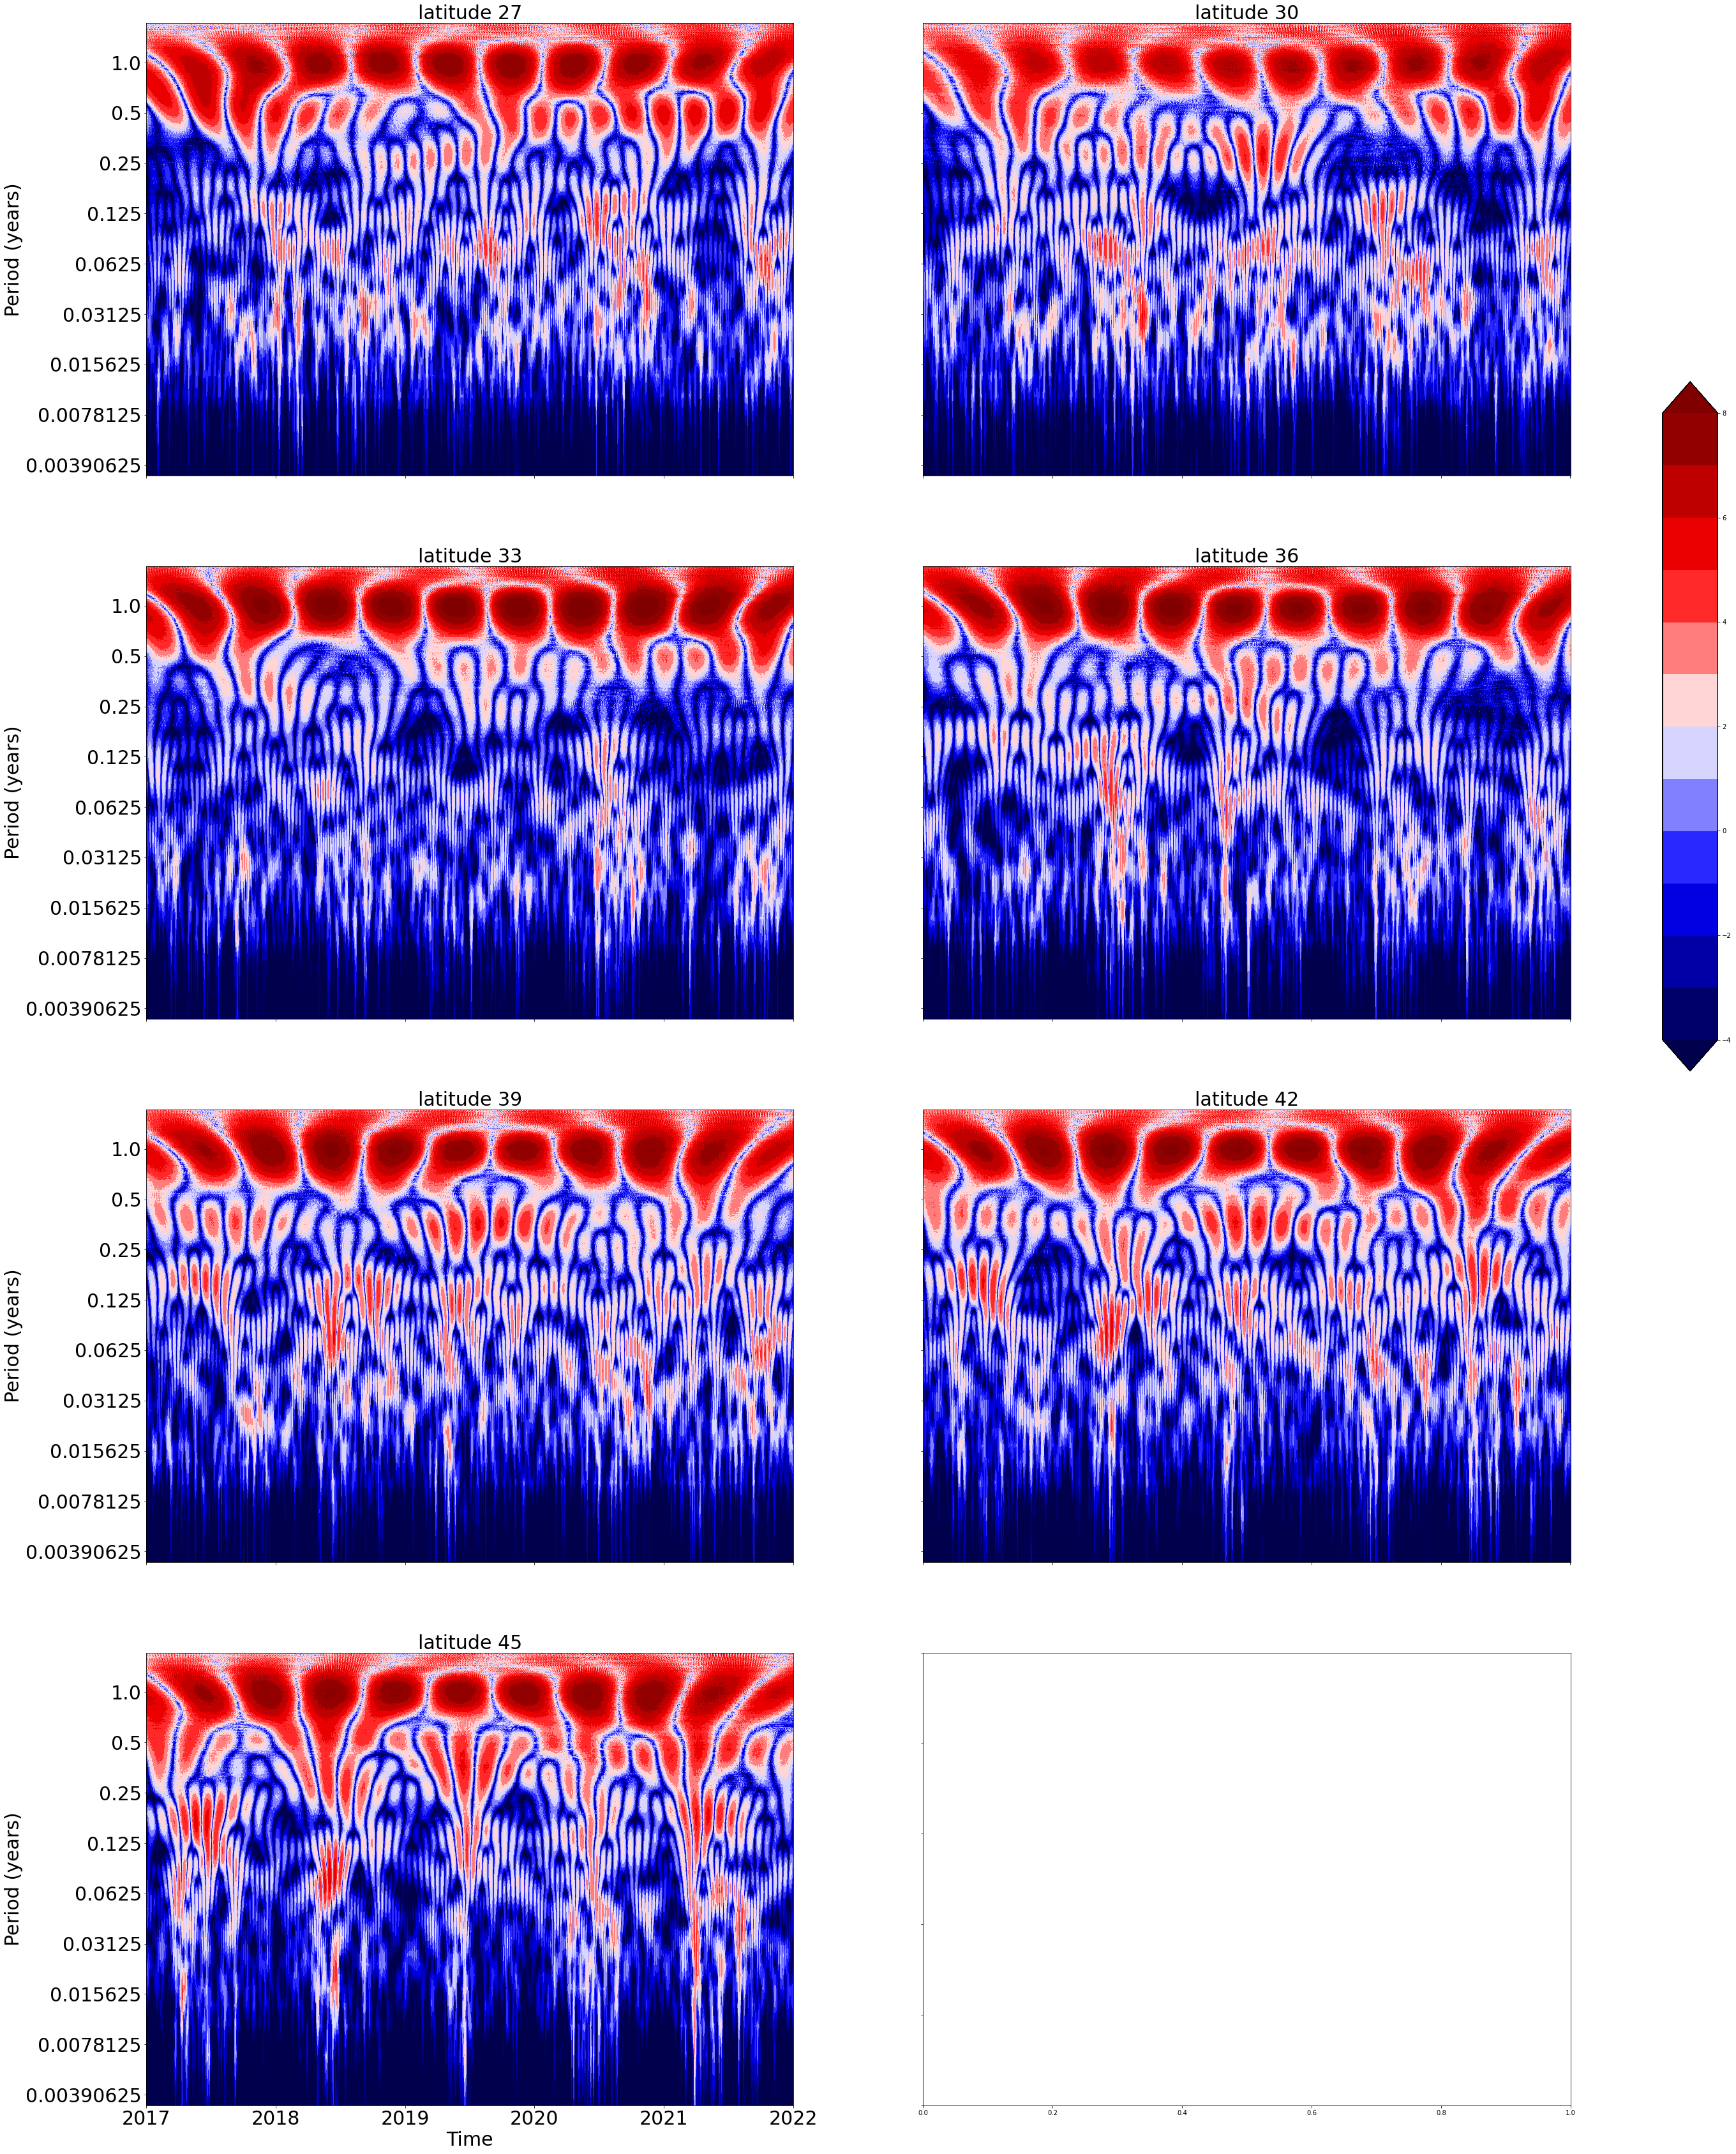

In [107]:
N = len(w_30_five)
t0=2017
dt= (1/365)
time = np.arange(0, N) * dt + t0
sampling_period = 1/365
def plot_wavelet(ax, time, signal, scales, waveletname = 'morl', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = coefficients**2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
    contourlevels = np.log2(levels)
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=30)
    ax.set_xlabel(xlabel, fontsize=30)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.tick_params(axis="x", labelsize=30)
    ax.tick_params(axis="y", labelsize=30)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[1], ylim[0])
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")

    return yticks, ylim
scales = np.arange(1, 512)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

fig, axs = plt.subplots(4,2,figsize=(40, 60))
plot_wavelet(axs[0,0], time, w_27_five, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 27')
plot_wavelet(axs[0,1], time, w_30_five, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 30')
plot_wavelet(axs[1,0], time, w_33_five, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 33')
plot_wavelet(axs[1,1], time, w_36_five, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 36')
plot_wavelet(axs[2,0], time, w_39_five, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 39')
plot_wavelet(axs[2,1], time, w_42_five, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 42')
plot_wavelet(axs[3,0], time, w_45_five, scales, xlabel=xlabel, ylabel=ylabel, title='latitude 45')

for ax in axs.flat:
    ax.label_outer()
plt.show()

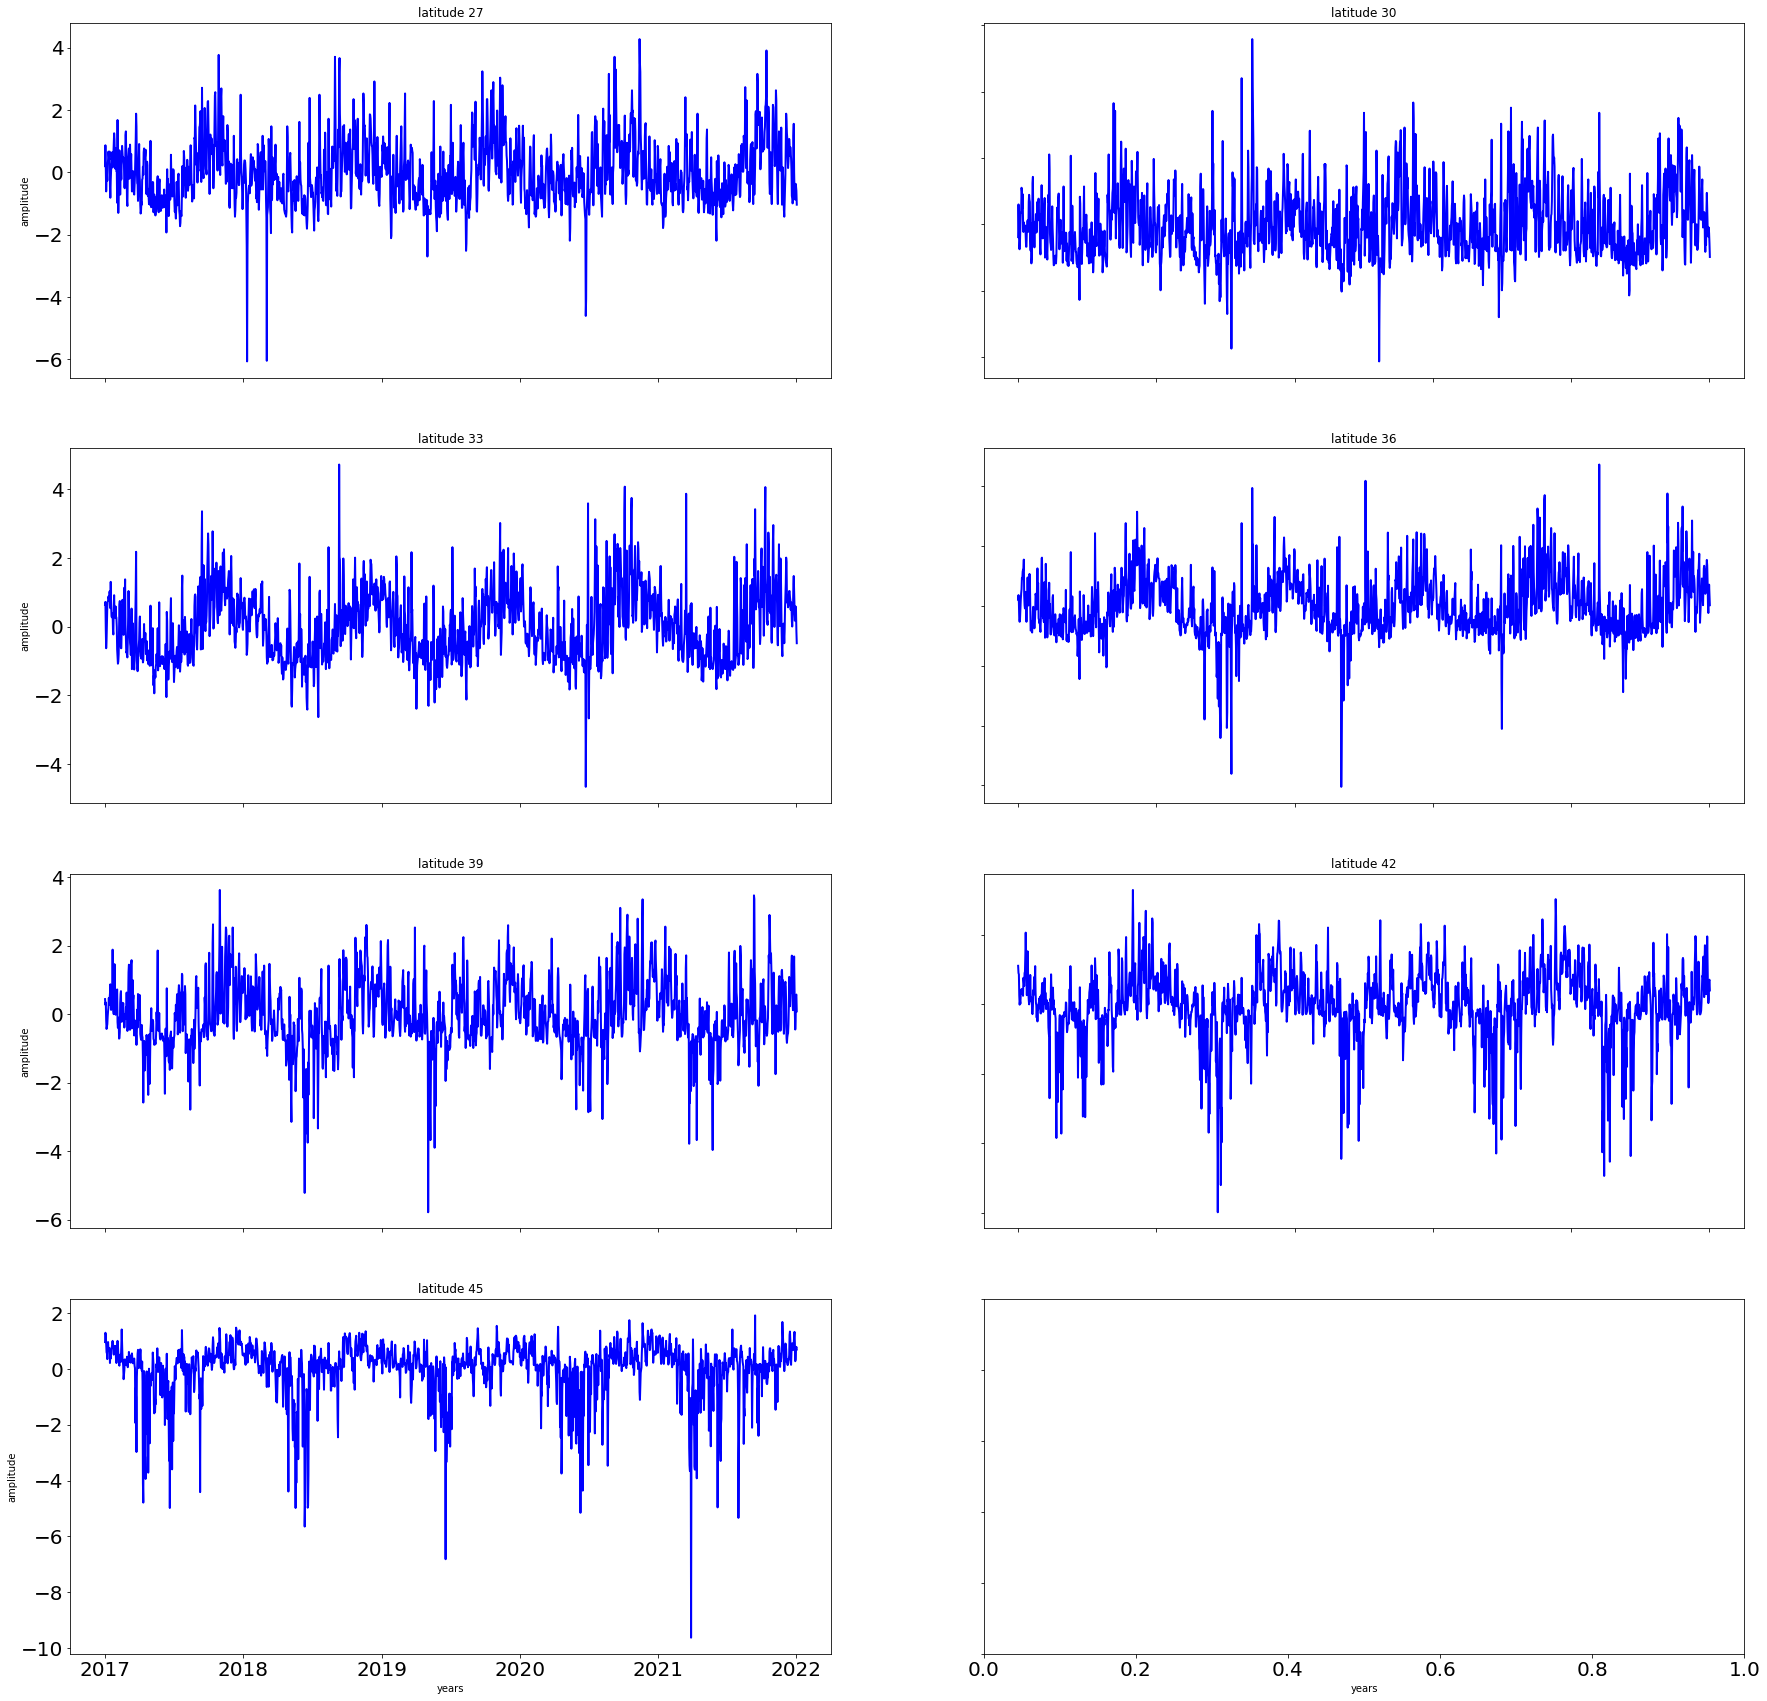

In [109]:
fig, axs = plt.subplots(4,2, figsize=(30,30))
axs[0,0].plot(time, w_27_five, color='b', lw=2)
axs[0, 0].set_title('latitude 27')
axs[0,1].plot(time, w_30_five, color='b', lw=2)
axs[0, 1].set_title('latitude 30')
axs[1,0].plot(time, w_33_five, color='b', lw=2)
axs[1, 0].set_title('latitude 33')
axs[1,1].plot(time, w_36_five, color='b', lw=2)
axs[1, 1].set_title('latitude 36')
axs[2,0].plot(time, w_39_five, color='b', lw=2)
axs[2, 0].set_title('latitude 39')
axs[2,1].plot(time, w_42_five, color='b', lw=2)
axs[2, 1].set_title('latitude 42')
axs[3,0].plot(time, w_45_five, color='b', lw=2)
axs[3, 0].set_title('latitude 45')
for ax in axs.flat:
    ax.set(xlabel='years', ylabel='amplitude')
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

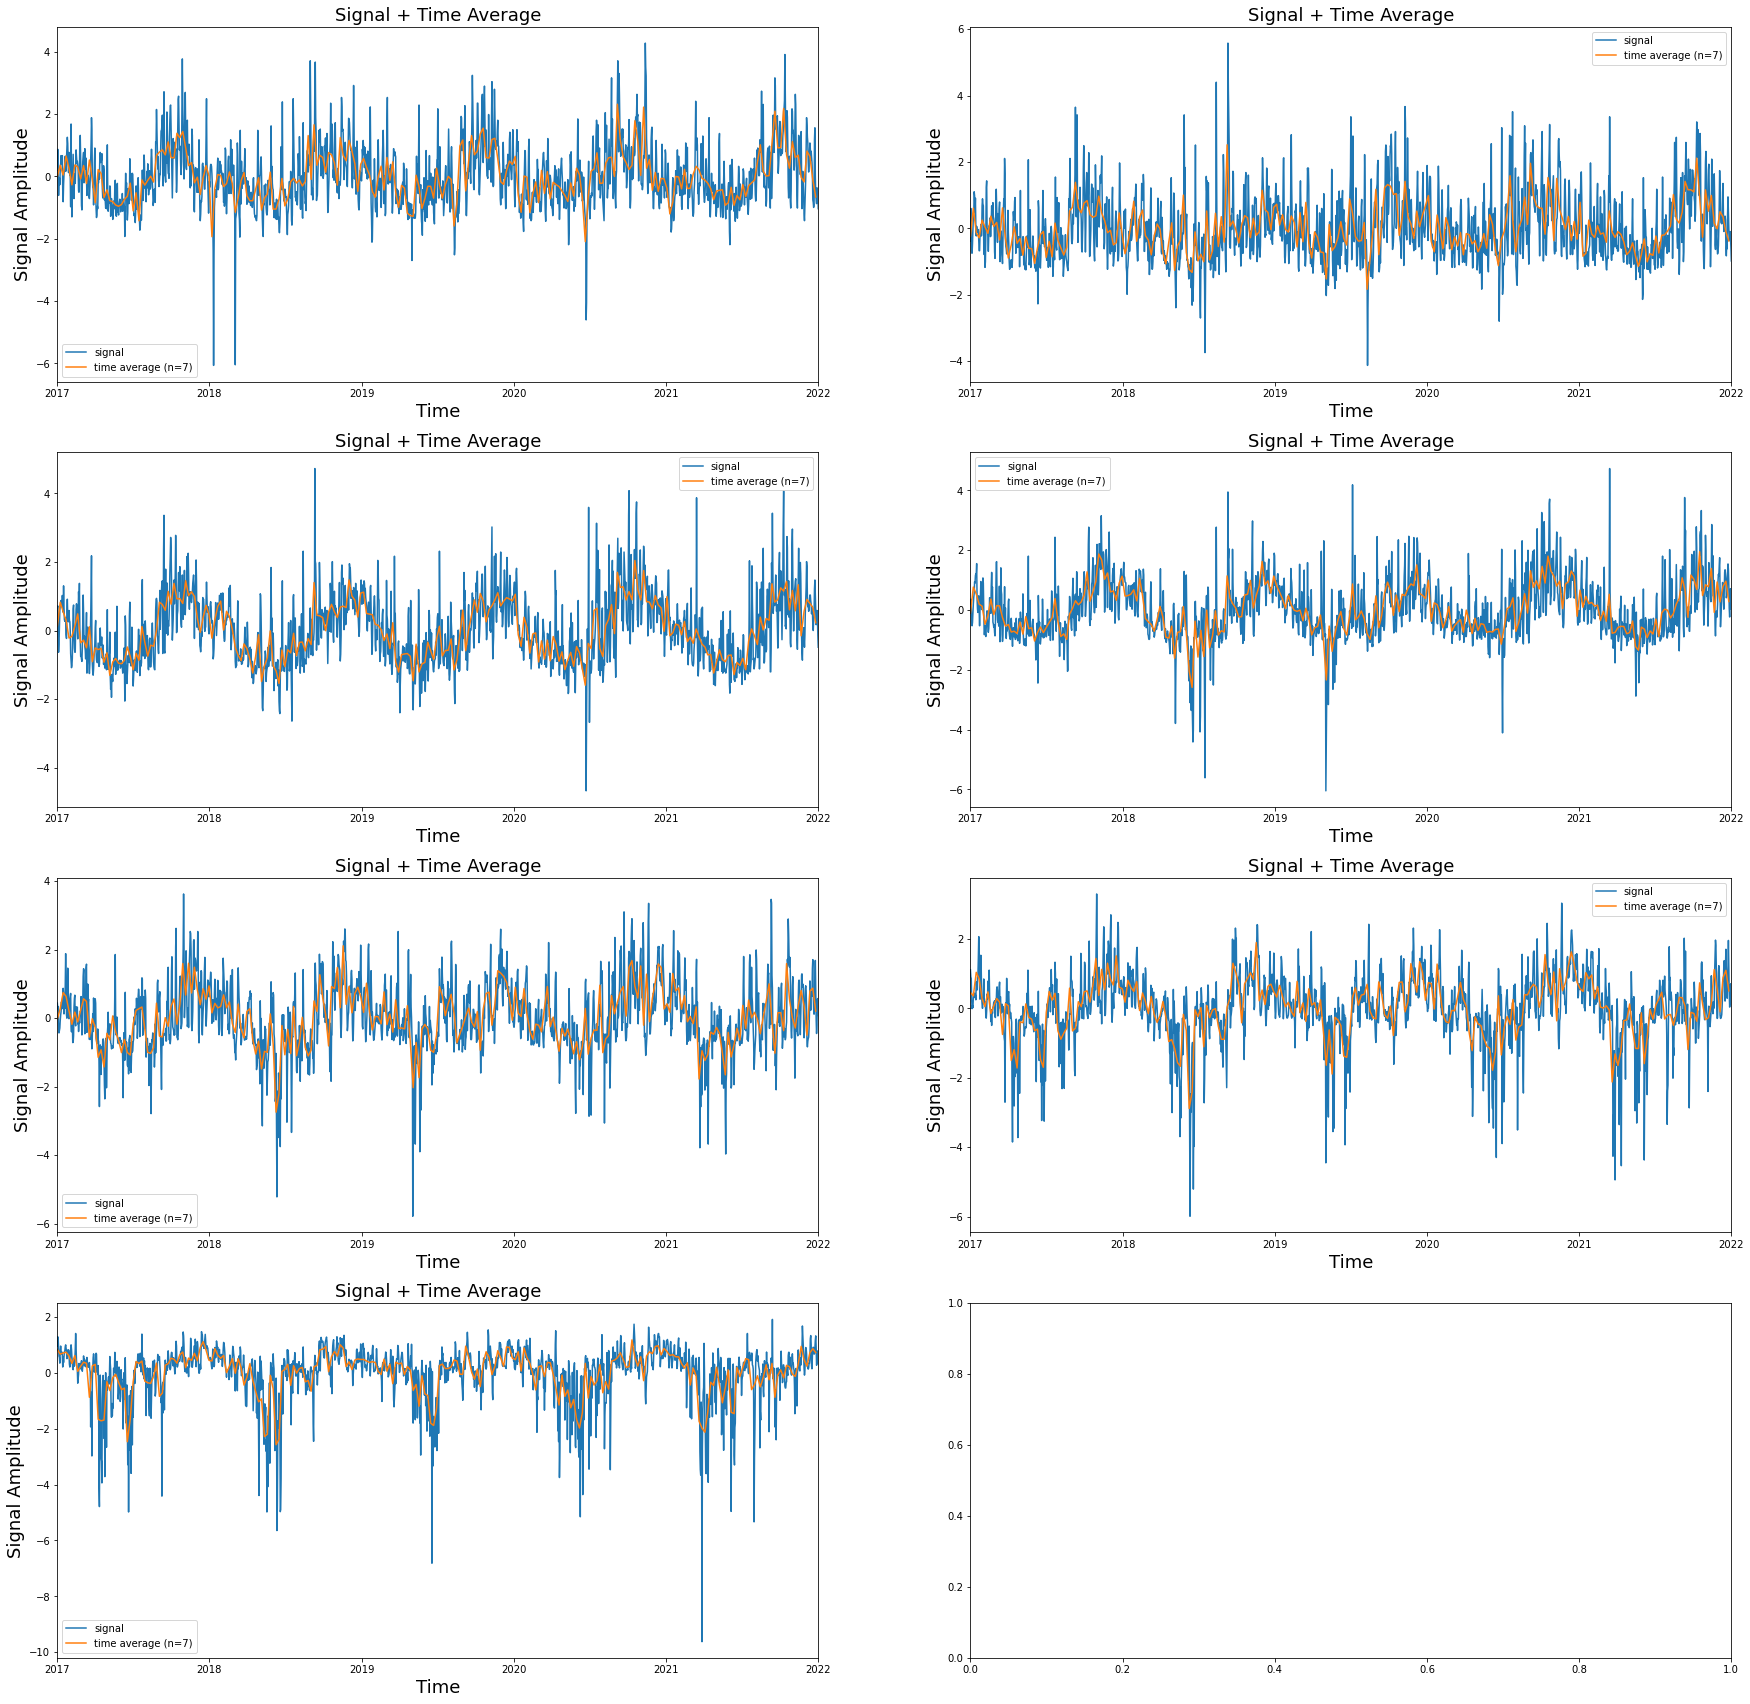

In [115]:
def get_ave_values(xvalues, yvalues, n = 5):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = np.array(xvalues)
    yarr = np.array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = np.nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave


def plot_signal_plus_average(ax, time, signal, average_over = 5):
#     fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(average_over))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
#     plt.show()

fig, axs = plt.subplots(4,2, figsize=(30,30))
plot_signal_plus_average(axs[0, 0], time, w_27_five, average_over = 7)
plot_signal_plus_average(axs[0, 1], time, w_30_five, average_over = 7)
plot_signal_plus_average(axs[1, 0], time, w_33_five, average_over = 7)
plot_signal_plus_average(axs[1, 1], time, w_36_five, average_over = 7)
plot_signal_plus_average(axs[2, 0], time, w_39_five, average_over = 7)
plot_signal_plus_average(axs[2, 1], time, w_42_five, average_over = 7)
plot_signal_plus_average(axs[3, 0], time, w_45_five, average_over = 7)

In [132]:
def moving_ave(arr):
    i = 1
    # Initialize an empty list to store cumulative moving
    # averages
    moving_averages = []

    # Store cumulative sums of array in cum_sum array
    cum_sum = np.cumsum(arr);

    # Loop through the array elements
    while i <= len(arr):

        # Calculate the cumulative average by dividing
        # cumulative sum by number of elements till 
        # that position
        window_average = round(cum_sum[i-1] / i, 2)

        # Store the cumulative average of
        # current window in moving average list
        moving_averages.append(window_average)

        # Shift window to right by one position
        i += 1
    # print(moving_averages)
    return (moving_averages)

first_6 = moving_ave(list(w_30_five[:6]))

def rest(arr):
    window_size = 7

    i = 0
    # Initialize an empty list to store moving averages
    moving_averages = []

    # Loop through the array t o
    #consider every window of size 36
    while i < len(arr) - window_size + 1:

        # Calculate the average of current window
        window_average = round(np.sum(arr[
          i:i+window_size]) / window_size, 2)

        # Store the average of current
        # window in moving average list
        moving_averages.append(window_average)

        # Shift window to right by 12 position
        i += 1
    return (moving_averages)


# first six days use cumulative average
# the rest use 7-days window average

rest = rest(w_30_five)
all_ave = first_6.append(rest)

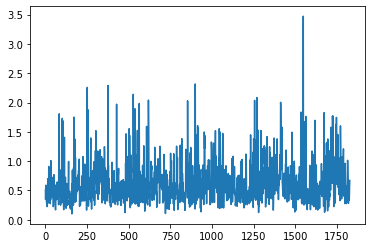

In [131]:
sd = []
total = [w_27_five, w_30_five, w_33_five, w_36_five, w_39_five, w_42_five, w_45_five]
for i in range(len(w_27_five)):
    summation = 0
    for j in range(len(total)):
        summation += total[j][i]
    summation = summation / len(total)
    final = 0
    for z in total:
        final += (z[i] - summation)**2 / (len(total) - 1)
    final = np.sqrt(final)
    sd.append(final)
plt.plot(range(len(sd)),sd)
